<a href="https://colab.research.google.com/github/myDSMLProjects/PyTorch-Fundamentals/blob/master/Regression_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# HP
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.001

In [13]:
# Toy Dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [14]:
print(x_train.shape)
print(y_train.shape)

(15, 1)
(15, 1)


In [29]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
loss_criterion = nn.MSELoss()
optimizer = optim.Adam(params=model.parameters(), lr=learning_rate)

loss_list = []
for epoch in range(num_epochs):
  inputs = torch.from_numpy(x_train)
  targets = torch.from_numpy(y_train)

  # Forward propogation
  outputs = model(inputs)
  loss  =loss_criterion(outputs, targets)

  loss_list.append(loss.item())

  # Back propogation
  optimizer.zero_grad()
  loss.backward()
  #update weights
  optimizer.step()

  if epoch%100==0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss:{loss.item():.2f}')

Epoch 1/1000, Loss:10.35
Epoch 101/1000, Loss:6.32
Epoch 201/1000, Loss:3.64
Epoch 301/1000, Loss:1.99
Epoch 401/1000, Loss:1.06
Epoch 501/1000, Loss:0.58
Epoch 601/1000, Loss:0.35
Epoch 701/1000, Loss:0.26
Epoch 801/1000, Loss:0.22
Epoch 901/1000, Loss:0.21


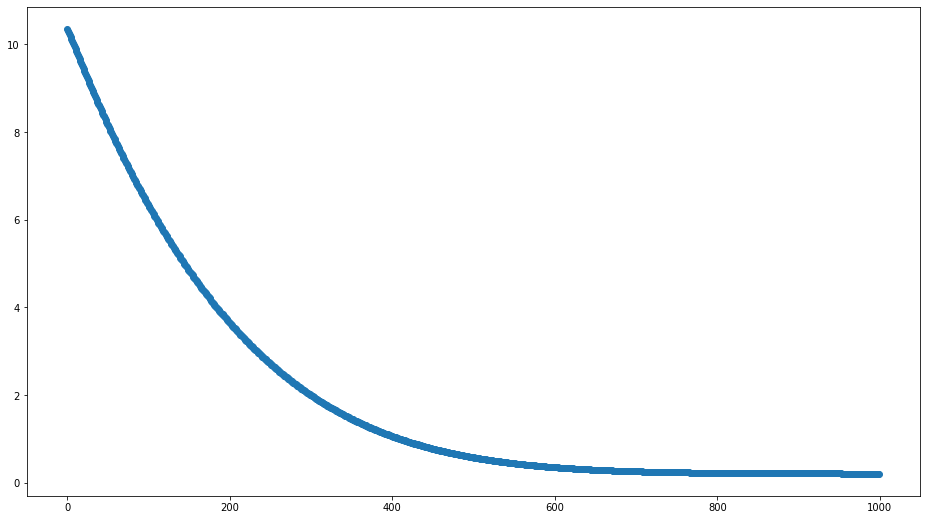

In [30]:
plt.figure(figsize=(16,9))
plt.scatter(x = [range(1000)], y = loss_list)

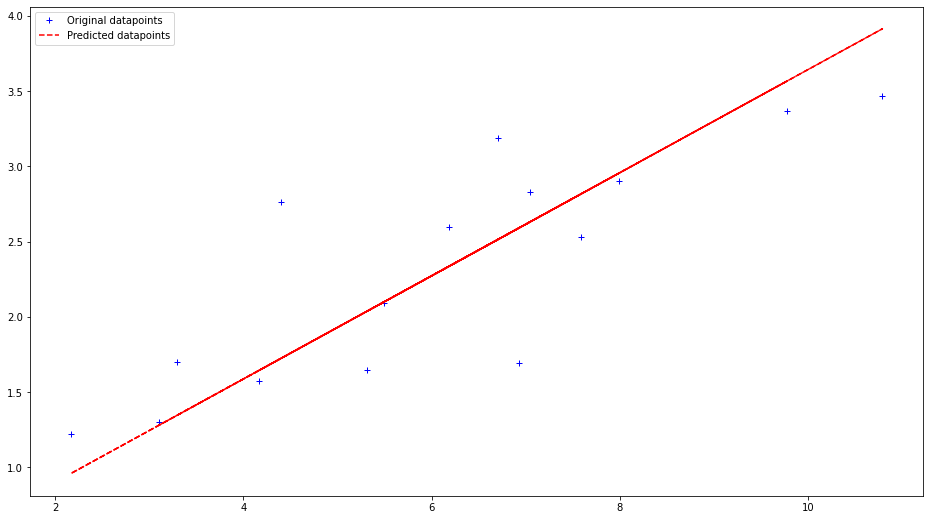

In [35]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.figure(figsize=(16,9))
plt.plot(x_train, y_train, 'b+', label='Original datapoints')
plt.plot(x_train, predicted, 'r--', label='Predicted datapoints')
plt.legend();